In [1]:
# import necessary libraries
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

### **DOWNLOAD THE DATASET**

In [2]:
url = "http://download.tensorflow.org/example_images/flower_photos.tgz" 
data_dir = tf.keras.utils.get_file('flower_photos', origin = url, untar = True)

In [3]:
# data directory
data_dir

'/root/.keras/datasets/flower_photos'

In [4]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


- **There are 5 types of flowers in the dataset**

### **CONVERT THE DATA DIRECTORY INTO A PATHLIB**

In [5]:
import pathlib 
flower_dir = pathlib.Path(data_dir)
flower_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [6]:
# Get the top 5 images file path
list(flower_dir.glob('*/*.jpg'))[:5]

[PosixPath('/root/.keras/datasets/flower_photos/daisy/3456403987_5bd5fa6ece_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/5885826924_38fdc6bcaa_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/15029936576_8d6f96c72c_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/14333681205_a07c9f1752_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/4281102584_c548a69b81_m.jpg')]

In [7]:
# Total number of flower images in the directory
len(list(flower_dir.glob('*/*.jpg')))

3670

In [8]:
# top 5 daisy images file path 
daisy = list(flower_dir.glob('daisy/*'))
daisy[:5]

[PosixPath('/root/.keras/datasets/flower_photos/daisy/3456403987_5bd5fa6ece_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/5885826924_38fdc6bcaa_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/15029936576_8d6f96c72c_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/14333681205_a07c9f1752_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy/4281102584_c548a69b81_m.jpg')]

### **QUICK DATA VISUALIZATION**

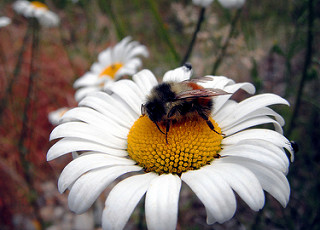

In [9]:
import PIL # to view/show images 
PIL.Image.open(daisy[1])

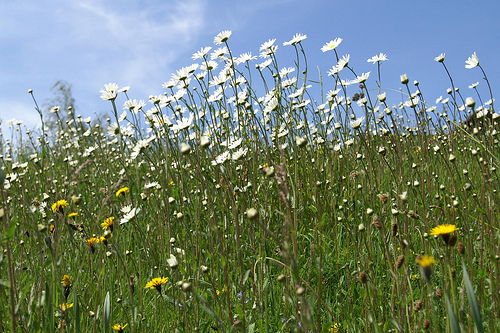

In [10]:
PIL.Image.open(daisy[100])

### **DICTIONARY OF FLOWER IMAGES CLASS AND THEIR RESPECTIVE IMAGES FILEPATH***

In [11]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [12]:
flower_images_dict = {
    'daisy' : list(flower_dir.glob('daisy/*')), 
    'dandelion' : list(flower_dir.glob('dandelion/*')), 
    'roses' : list(flower_dir.glob('roses/*')),
    'sunflowers' : list(flower_dir.glob('sunflowers/*')), 
    'tulips' : list(flower_dir.glob('tulips/*'))
    
}

In [13]:
flower_labels_dict = {
    'daisy' : 0, 
    'dandelion' : 1, 
    'roses' : 2, 
    'sunflowers' : 3, 
    'tulips' : 4
}

In [14]:
import cv2 # to do a bunch of stuffs like showing images, converting imagegse to 3D numpy arrays 
img = cv2.imread(str(flower_images_dict['roses'][0])) 
img

array([[[ 70, 149, 105],
        [ 71, 151, 104],
        [ 72, 154, 105],
        ...,
        [ 11,   1, 131],
        [  9,   0, 129],
        [  7,   0, 127]],

       [[ 74, 155, 108],
        [ 74, 156, 107],
        [ 74, 157, 105],
        ...,
        [ 10,   0, 130],
        [ 10,   0, 131],
        [ 10,   0, 131]],

       [[ 78, 163, 111],
        [ 77, 162, 110],
        [ 75, 161, 107],
        ...,
        [ 10,   0, 131],
        [ 11,   0, 134],
        [ 13,   2, 136]],

       ...,

       [[ 37,  66,  63],
        [ 30,  65,  61],
        [ 25,  67,  60],
        ...,
        [113, 209, 162],
        [119, 216, 166],
        [123, 218, 167]],

       [[ 43,  72,  69],
        [ 36,  72,  66],
        [ 25,  70,  61],
        ...,
        [104, 196, 155],
        [113, 203, 160],
        [117, 207, 164]],

       [[ 48,  77,  74],
        [ 42,  78,  72],
        [ 30,  75,  66],
        ...,
        [ 97, 184, 150],
        [105, 193, 157],
        [111, 198, 162]]

In [15]:
# tensor shape
img.shape

(240, 320, 3)

In [16]:
# resize the image a particular dimension 
img = cv2.resize(img, (180, 180))
img.shape

(180, 180, 3)

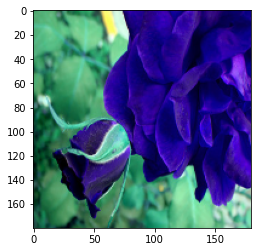

In [17]:
# plot the 3D numpy array 
import matplotlib.pyplot as plt 
plt.imshow(img)

### **CONVERT ALL THE IMAGES TO TENSORS (3D ARRAYS)**

In [18]:
X, y = [], []

for flower_name, images in flower_images_dict.items(): 
  for image in images: 
    # convert all images to tensors
    img = cv2.imread(str(image)) 
    # resize all of the images 
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flower_labels_dict[flower_name])

In [19]:
len(X), len(y)

(3670, 3670)

### **CONVERT 3D ARRAYS TO NUMPY ARRAYS**

In [20]:
import numpy as np
X = np.array(X)
y = np.array(y)

### **SPLIT THE DATASET**

In [21]:
# import train_test_split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5)

 ### **NORMALIZE (SCALE) THE NUMPY ARRAYS TO BETWEEN O AND 1**

In [22]:
X_train.max(), X_train.min(), X_test.max(), X_test.min()

(255, 0, 255, 0)

In [23]:
# normalize by dividing all through with the max value(255)
X_train_scaled = X_train / 255.0

In [24]:
X_test_scaled = X_test / 255.0

### **BUILD A CNN MODEL**

In [25]:
# import necessary libraries 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout 

In [26]:
from tensorflow.keras import Sequential 
from tensorflow.keras.optimizers import Adam

- **The model overfiited and did not generalize on the test data. It actually performed poorly on the test data**

### **BUILD A CNN MODEL WITH MAXPOOL LAYER**

In [27]:
# create a model 
tf.random.set_seed(5)
cnn_2 = Sequential([
    Conv2D(16, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(),
    Conv2D(32, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(), 
    Conv2D(64, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(), 
    Flatten(), 
    Dense(250, activation = 'relu'), 
    Dense(5, activation = 'softmax')
])

In [28]:
# compile the model
cnn_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['accuracy'])

In [29]:
history_2 = cnn_2.fit(x = X_train_scaled, 
                      y = y_train,  
                      epochs = 20, validation_data = (X_test_scaled, y_test)) 

Epoch 1/20
86/86 [==============================] - 12s 37ms/step - loss: 1.3316 - accuracy: 0.4371 - val_loss: 1.1256 - val_accuracy: 0.5425
Epoch 2/20
86/86 [==============================] - 2s 29ms/step - loss: 0.9758 - accuracy: 0.6083 - val_loss: 1.0268 - val_accuracy: 0.5926
Epoch 3/20
86/86 [==============================] - 2s 28ms/step - loss: 0.7641 - accuracy: 0.7082 - val_loss: 0.9418 - val_accuracy: 0.6492
Epoch 4/20
86/86 [==============================] - 3s 29ms/step - loss: 0.5276 - accuracy: 0.8067 - val_loss: 1.0437 - val_accuracy: 0.6590
Epoch 5/20
86/86 [==============================] - 3s 29ms/step - loss: 0.3132 - accuracy: 0.8855 - val_loss: 1.1613 - val_accuracy: 0.6394
Epoch 6/20
86/86 [==============================] - 2s 29ms/step - loss: 0.1854 - accuracy: 0.9357 - val_loss: 1.3585 - val_accuracy: 0.6471
Epoch 7/20
86/86 [==============================] - 3s 29ms/step - loss: 0.1008 - accuracy: 0.9735 - val_loss: 1.6690 - val_accuracy: 0.6307
Epoch 8/20
8

In [30]:
cnn_2.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 20ms/step - loss: 2.3584 - accuracy: 0.6296


[2.3583500385284424, 0.6296296119689941]

- **The model overfitted, performed well on the trainin data but performed poorly on the test dataset. Let's perform Data Augmentation on the dataset to deal with the overfitting issue.**

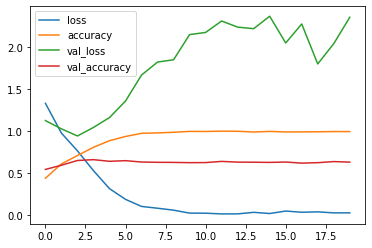

In [33]:
import pandas as pd 
pd.DataFrame(history_2.history).plot()

- **Increase in the validation loss is also a way to detect overfitting in a model**

In [34]:
cnn_2_pred_prob = cnn_2.predict(X_test_scaled)
cnn_2_pred_prob[0]

29/29 [==============================] - 1s 20ms/step


array([1.0000000e+00, 1.0392047e-08, 1.5953059e-08, 2.5430415e-08,
       1.1064972e-09], dtype=float32)

In [35]:
cnn_2_pred = tf.argmax(cnn_2_pred_prob, axis = 1)
cnn_2_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 3, 2, 4, 1, 0, 3, 4, 3])>

### **CONFUSION MATRIX AND CLASSIFICATION REPORT**

In [37]:
from sklearn.metrics import confusion_matrix, classification_report 

# confusion matrix
confusion_matrix(y_test, cnn_2_pred)

array([[107,  12,  19,   3,  14],
       [ 37, 142,  11,  11,   8],
       [ 28,  14,  89,   2,  27],
       [ 19,  14,   5, 124,  16],
       [ 39,  13,  39,   9, 116]])

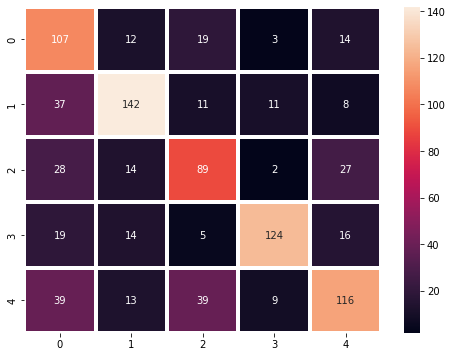

In [38]:
# heatmap 
import seaborn as sns
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(y_test, cnn_2_pred), annot = True, 
            fmt = 'd', linewidth = 3)

In [40]:
# classification report 
print(classification_report(y_test, cnn_2_pred))

              precision    recall  f1-score   support

           0       0.47      0.69      0.56       155
           1       0.73      0.68      0.70       209
           2       0.55      0.56      0.55       160
           3       0.83      0.70      0.76       178
           4       0.64      0.54      0.58       216

    accuracy                           0.63       918
   macro avg       0.64      0.63      0.63       918
weighted avg       0.65      0.63      0.63       918



### **DATA AUGMENTATION**

- This link https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing contains the differents augmentation transformation options in tensorflow

In [71]:
# data augmentation layer
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomContrast(0.2),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.2)
])

In [72]:
# create a model 
tf.random.set_seed(5)
cnn_3 = Sequential([
    data_augmentation,
    Conv2D(16, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(),
    Conv2D(32, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(), 
    Conv2D(64, 3, padding = 'same', activation = 'relu'), 
    MaxPool2D(), 
    Flatten(), 
    Dense(500, activation = 'relu'),
    Dense(5, activation = 'softmax')
])

In [73]:
# compile the model
cnn_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer = tf.keras.optimizers.Adam(), 
              metrics = ['accuracy'])

In [ ]:
history_3 = cnn_3.fit(x = X_train_scaled, 
                      y = y_train,  
                      epochs = 30, 
                      validation_data = (X_test_scaled, y_test)) 

In [70]:
cnn_3.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 0s 15ms/step - loss: 0.7787 - accuracy: 0.7255


[0.7787237763404846, 0.7254902124404907]